In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

2023-11-08 14:39:01.569847: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import pickle

In [3]:
input_text = pickle.load(open('Train_input', 'rb'))
output_text = pickle.load(open('Train_output', 'rb'))

In [4]:
len(output_text)

112000

In [5]:
len(input_text)

112000

In [6]:
count = 0
text_pairs = []
for i in range(len(output_text)):
    out = "[start] " + output_text[i] + "[end]"
    if len(output_text[i]) != len(input_text[i]):
        count += 1
    text_pairs.append((input_text[i], out))
print("number of input and output texts with different lengths: %d" % count)
#data = zip(input_text, output_text)
#for i,o in data:
#    print(i)
#    print(o)
#    break

number of input and output texts with different lengths: 112000


In [7]:
import random
print(random.choice(text_pairs))
random.shuffle(text_pairs)

('a h a d a d b d a f a e b d b d c g c g a h c f c d b d ', '[start] b d b d a e e b d a f f g a d d h c g a d i j c g c f c d b d a h m ed ee a h k l ef [end]')


In [8]:
'''
from sklearn.model_selection import train_test_split
trainval_pairs, test_pairs = train_test_split(text_pairs, test_size=0.15, random_state=3)
train_pairs, val_pairs = train_test_split(trainval_pairs, test_size=0.15/.85, random_state=3)
'''


'\nfrom sklearn.model_selection import train_test_split\ntrainval_pairs, test_pairs = train_test_split(text_pairs, test_size=0.15, random_state=3)\ntrain_pairs, val_pairs = train_test_split(trainval_pairs, test_size=0.15/.85, random_state=3)\n'

In [9]:
train_pairs = pickle.load(open("train_pairs.pkl", "rb"))
val_pairs = pickle.load(open("val_pairs.pkl", "rb"))
test_pairs = pickle.load(open("test_pairs.pkl", "rb"))

In [10]:
len(train_pairs)/len(text_pairs), len(val_pairs)/len(text_pairs), len(test_pairs)/len(text_pairs)

(0.7, 0.15, 0.15)

# Exploratory Data Analysis

In [11]:
# input text
max_len = 0
#freq_dict = {}
input_df = []
for text in input_text:
    token_lst = text.strip().split(' ')
    if len(token_lst) > max_len:
        max_len = len(token_lst)
    for token in token_lst:
        #if freq_dict.get(token): freq_dict[token] += 1
        #else: freq_dict[token] = 1
        input_df.append(token)

print("Maximum token (separated by space) length: %d" % max_len)

Maximum token (separated by space) length: 32


In [12]:
'''
tokens = []
freq = []
for key, val in freq_dict.items():
    tokens.append(key)
    freq.append(val)
tokens, freq
'''
pass

In [23]:
import pandas as pd

input_df = pd.DataFrame(input_df)
input_df.describe()

,0
count,2474794
unique,8
top,a
freq,558316


<AxesSubplot:xlabel='0', ylabel='Count'>

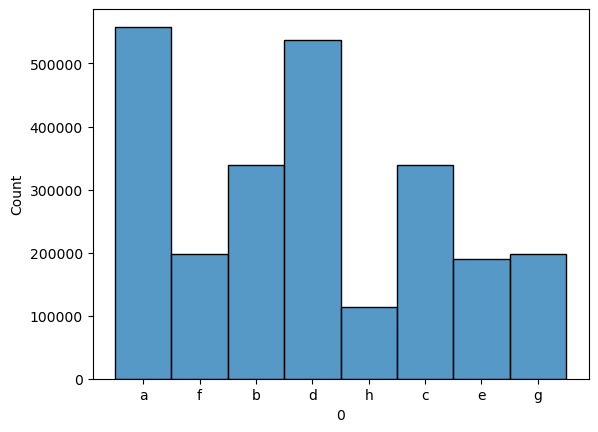

In [14]:
sns.histplot(input_df.iloc[:,0])

In [15]:
g2_input_df = []  # 2gram tokens
g3_input_df = []  # 3gram tokens
g4_input_df = []  # 4gram tokens
for text in input_text:
    token_lst = text.strip().split(' ')
    for i in range(len(token_lst) - 1):  # 2gram
        g2_token = token_lst[i] + " " + token_lst[i+1]
        g2_input_df.append(g2_token)
    for i in range(len(token_lst) - 2):  # 3 gram
        g3_token = token_lst[i] + " " + token_lst[i+1] + " " + token_lst[i+2]
        g3_input_df.append(g3_token)
    for i in range(len(token_lst) - 3):  # 4 gram
        g4_token = token_lst[i] + " " + token_lst[i+1] + " " + token_lst[i+2] + " " + token_lst[i+3]
        g4_input_df.append(g4_token)

              0
count   2362794
unique       25
top         b d
freq     339468


<AxesSubplot:xlabel='0', ylabel='Count'>

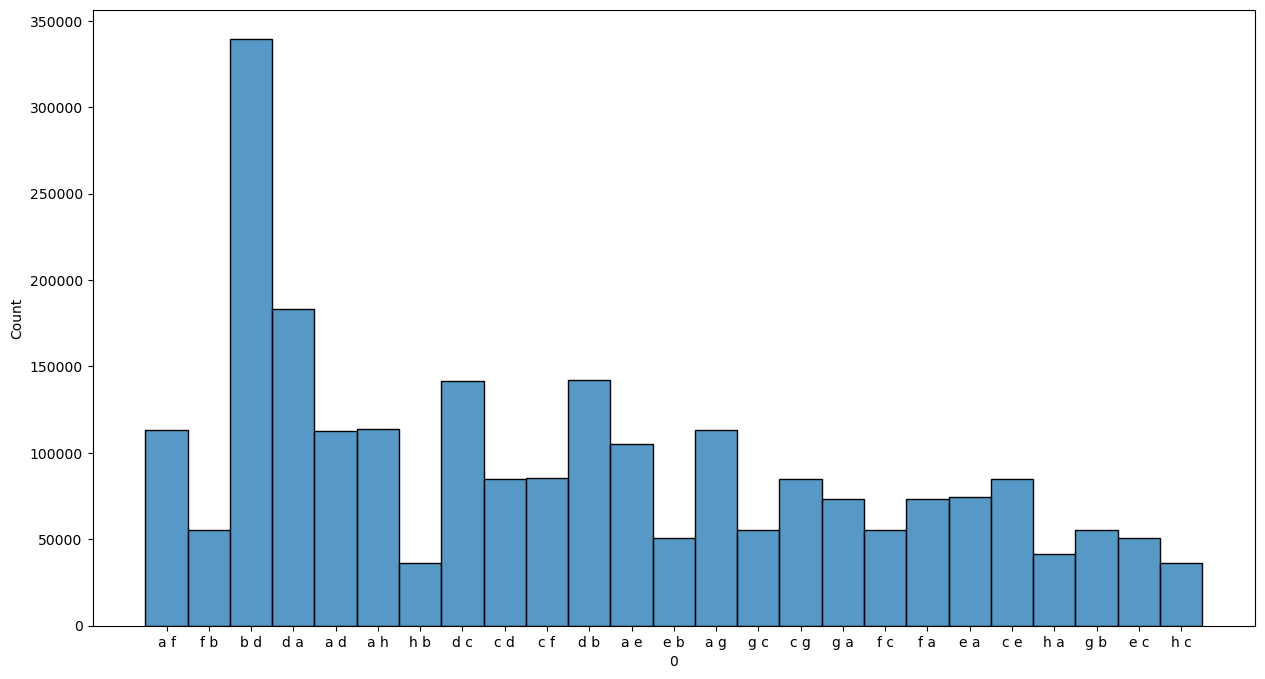

In [16]:
g2_input_df = pd.DataFrame(g2_input_df)
print(g2_input_df.describe())
plt.figure(figsize=(15,8))
sns.histplot(g2_input_df.iloc[:,0])

              0
count   2250794
unique       80
top       d b d
freq     141983


<AxesSubplot:xlabel='0', ylabel='Count'>

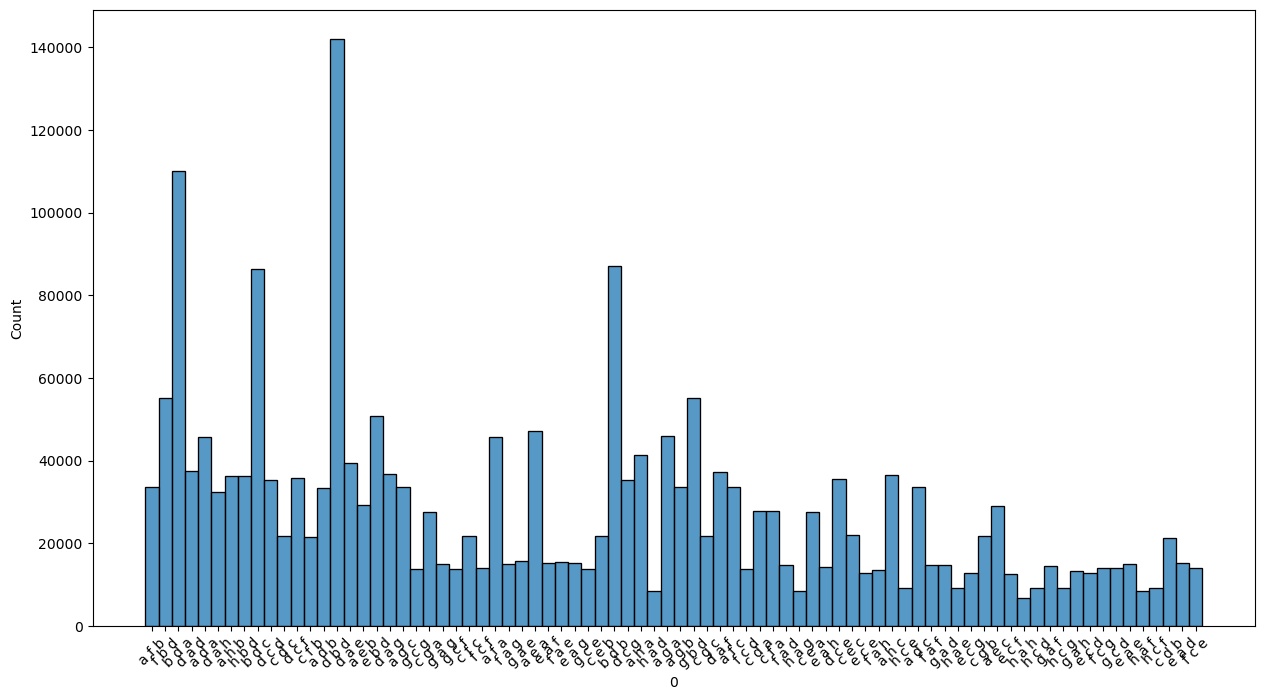

In [17]:
g3_input_df = pd.DataFrame(g3_input_df)
print(g3_input_df.describe())
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.histplot(g3_input_df.iloc[:,0])

              0
count   2138794
unique      250
top     b d b d
freq      87192
Top 10 most common 4 grams token in input text
b d b d    87192
d b d a    41182
a h b d    36278
d b d b    34643
d b d c    34384
a f b d    33707
a g b d    33628
a d b d    33459
a e b d    29138
b d a e    23771
dtype: int64


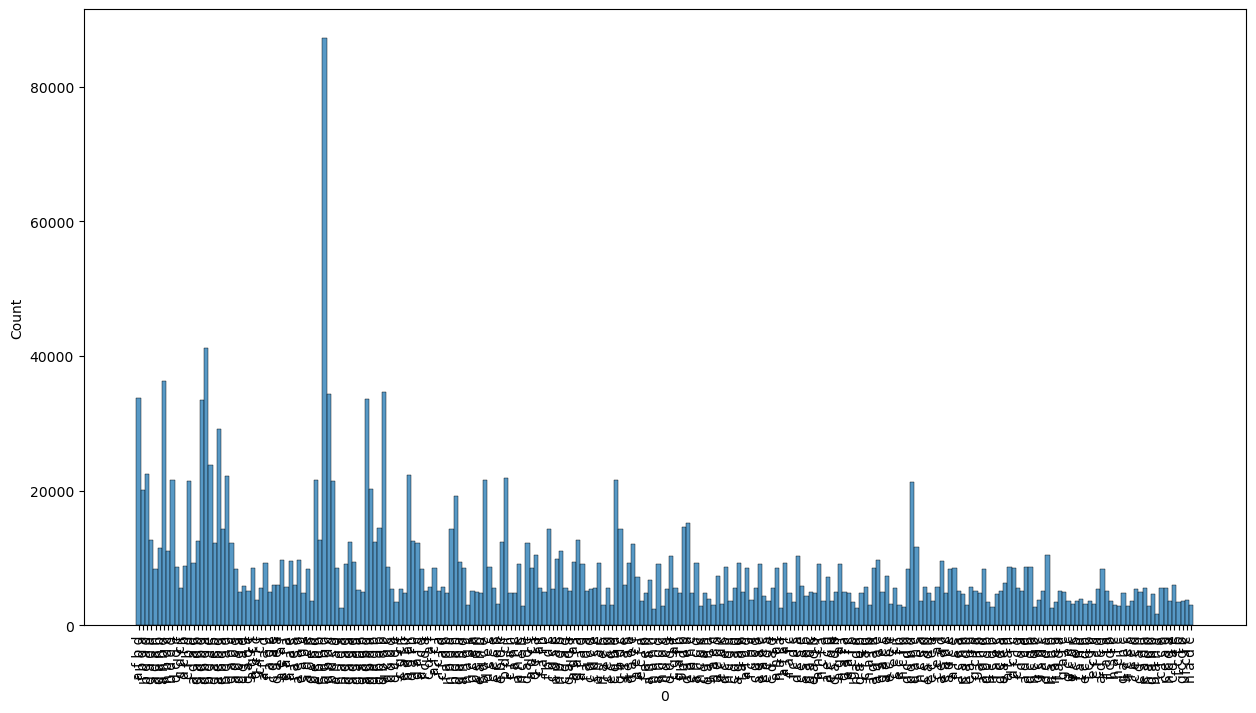

In [18]:
g4_input_df = pd.DataFrame(g4_input_df)
print(g4_input_df.describe())
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.histplot(g4_input_df.iloc[:,0])
print(f"Top 10 most common 4 grams token in input text\n{g4_input_df.value_counts()[:10]}")

2-grams, 3-grams, and 4-grams histogram indicates that certain sequence of words in input language appear frequently

In [19]:
# output text
max_len = 0
#freq_dict = {}
output_df = []
for text in output_text:
    token_lst = text.strip().split(' ')
    if len(token_lst) > max_len:
        max_len = len(token_lst)
    for token in token_lst:
        #if freq_dict.get(token): freq_dict[token] += 1
        #else: freq_dict[token] = 1
        output_df.append(token)

print("Maximum token (separated by space) length: %d" % max_len)

Maximum token (separated by space) length: 47


In [20]:
output_df = pd.DataFrame(output_df)
output_df.describe()

,0
count,3600191
unique,18
top,d
freq,649108


<AxesSubplot:xlabel='0', ylabel='Count'>

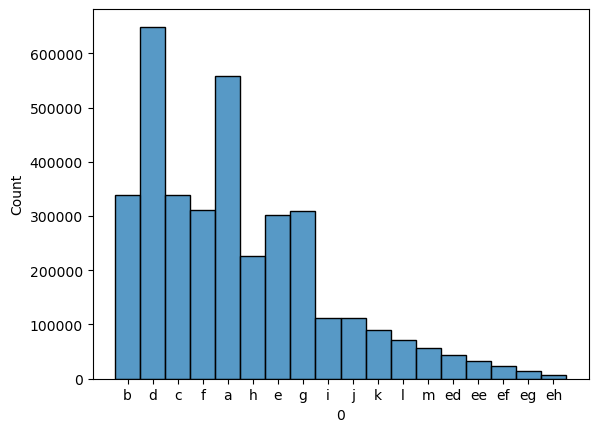

In [21]:
sns.histplot(output_df.iloc[:,0])

In [22]:
g2_output_df = []  # 2gram tokens
g3_output_df = []  # 3gram tokens
g4_output_df = []  # 4gram tokens
for text in output_text:
    token_lst = text.strip().split(' ')
    for i in range(len(token_lst) - 1):  # 2gram
        g2_token = token_lst[i] + " " + token_lst[i+1]
        g2_output_df.append(g2_token)
    for i in range(len(token_lst) - 2):  # 3 gram
        g3_token = token_lst[i] + " " + token_lst[i+1] + " " + token_lst[i+2]
        g3_output_df.append(g3_token)
    for i in range(len(token_lst) - 3):  # 4 gram
        g4_token = token_lst[i] + " " + token_lst[i+1] + " " + token_lst[i+2] + " " + token_lst[i+3]
        g4_output_df.append(g4_token)

              0
count   3488191
unique      170
top         b d
freq     339468


<AxesSubplot:xlabel='0', ylabel='Count'>

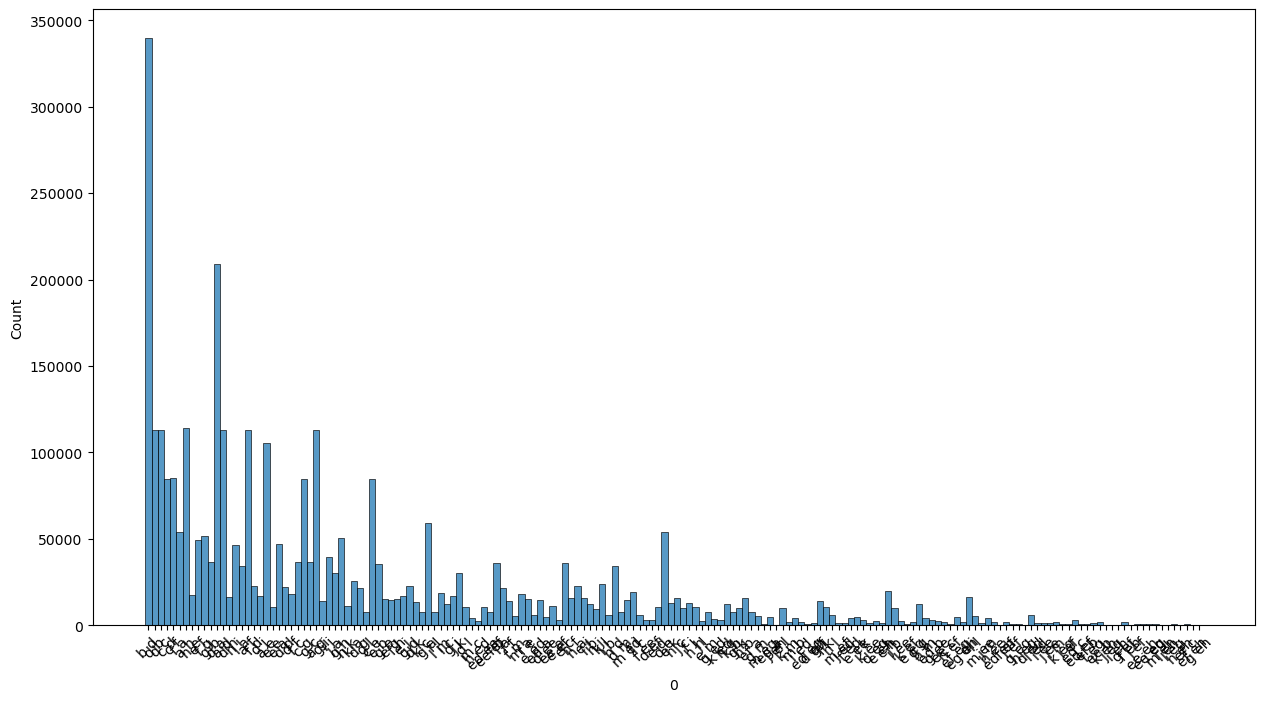

In [23]:
g2_output_df = pd.DataFrame(g2_output_df)
print(g2_output_df.describe())
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.histplot(g2_output_df.iloc[:,0])

              0
count   3376191
unique     1085
top       b d a
freq     166253
Top 10 most common 3 grams token in input text
b d a    166253
d b d    113090
b d b     86808
b d c     86407
d a h     45214
d a g     42177
d a d     41926
d a f     41914
c f a     41755
c d a     41462
dtype: int64


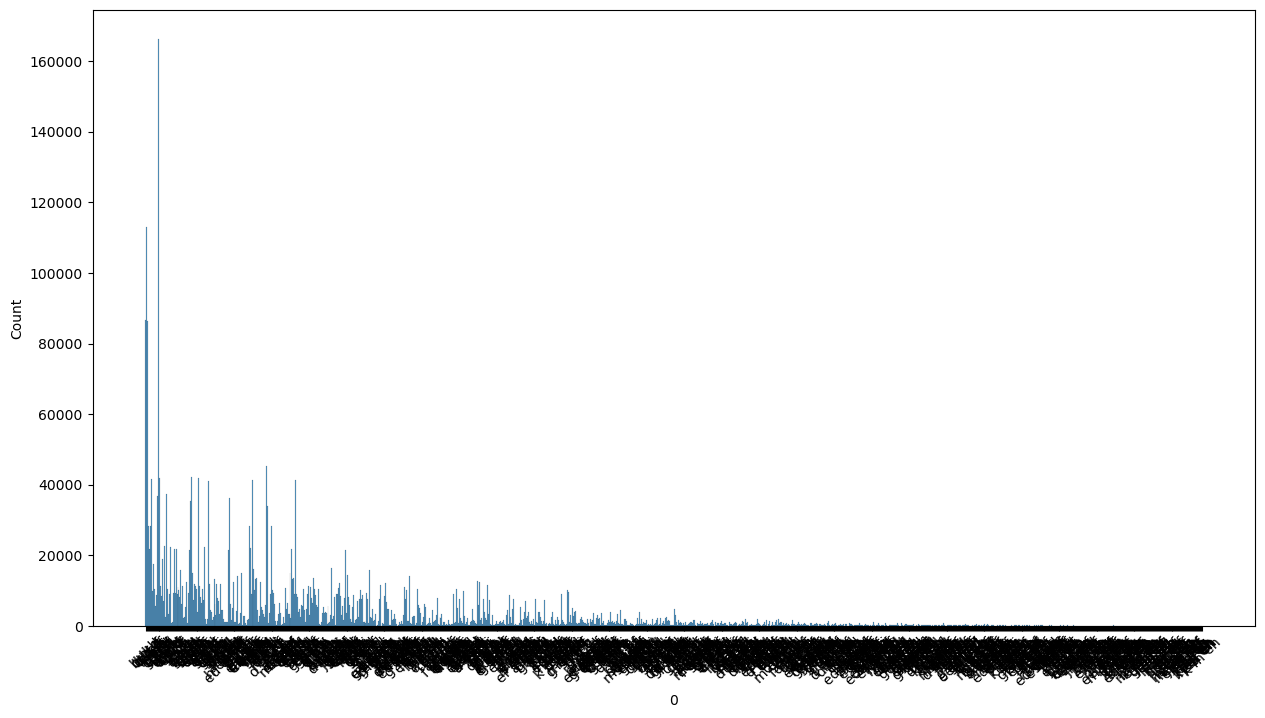

In [24]:
g3_output_df = pd.DataFrame(g3_output_df)
print(g3_output_df.describe())
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.histplot(g3_output_df.iloc[:,0])
print(f"Top 10 most common 3 grams token in input text\n{g3_output_df.value_counts()[:10]}")

              0
count   3264191
unique     3743
top     b d b d
freq      86808
Top 10 most common 4 grams token in input text
b d b d    86808
d b d a    59920
b d a h    36133
b d a g    33823
b d a d    33642
b d a f    33517
b d a e    29138
d b d b    26714
d b d c    26456
c g b d    21786
dtype: int64


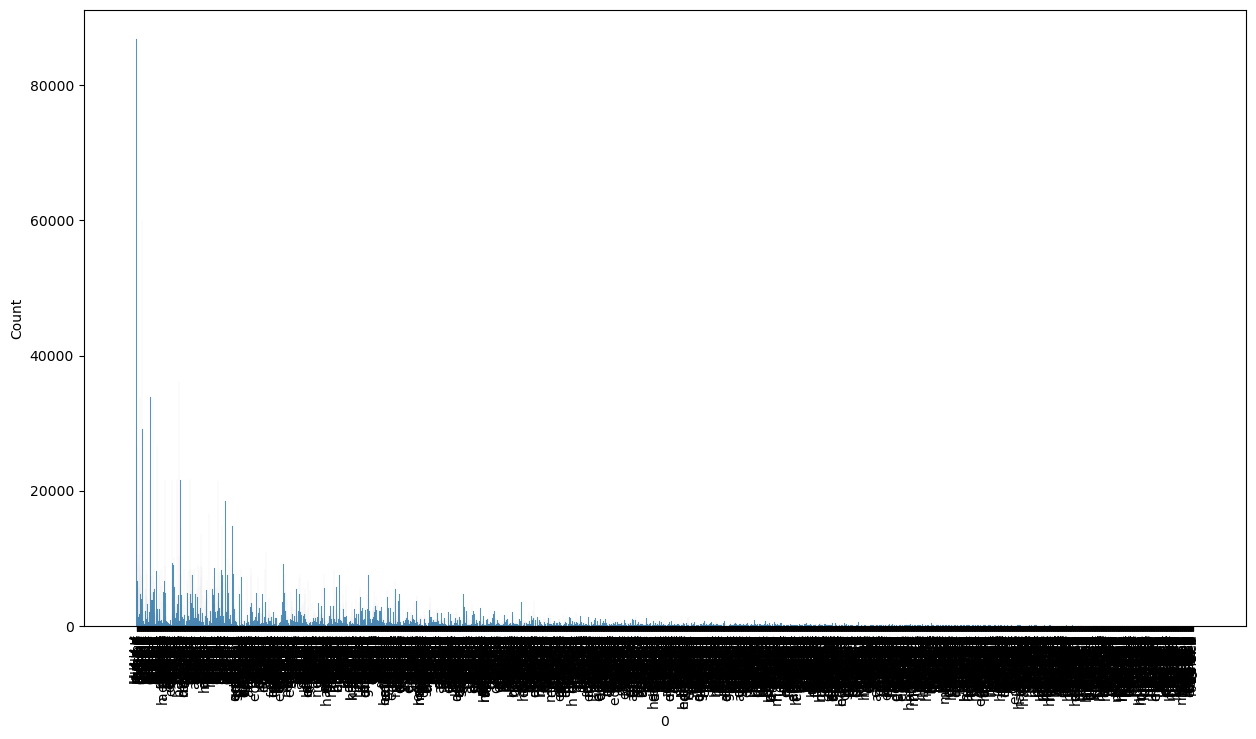

In [25]:
g4_output_df = pd.DataFrame(g4_output_df)
print(g4_output_df.describe())
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.histplot(g4_output_df.iloc[:,0])
print(f"Top 10 most common 4 grams token in input text\n{g4_output_df.value_counts()[:10]}")

2-grams, 3-grams, and 4-grams histogram indicates that certain sequence of words in output language appear frequently

# Data Preprocessing

In [33]:
# dimensions based on the dataset analysis
#input_seq_len = 32
input_seq_len = 47
input_vocab_size = 8
output_seq_len = 47
output_vocab_size = 18

In [34]:
# data preprocessing
import string
import re

strip_chars = string.punctuation
strip_chars = strip_chars.replace("[","")
strip_chars = strip_chars.replace("]","")

In [35]:
def text_standardization(input_str):
    lowercase = tf.strings.lower(input_str)
    # lowercase = lowercase.strip()
    return tf.strings.regex_replace(lowercase, f"[{re.escape(strip_chars)}]", "")

In [36]:
source_vectorization = layers.TextVectorization(
    max_tokens = input_vocab_size,
    output_mode = "int",
    output_sequence_length = input_seq_len,
    standardize = text_standardization,
    #ngrams=2
)
target_vectorization = layers.TextVectorization(
    max_tokens = output_vocab_size,
    output_mode = "int",
    output_sequence_length = output_seq_len + 1,
    standardize = text_standardization,
    #ngrams=2
)

In [37]:
train_input_texts = [pair[0] for pair in train_pairs]
train_output_texts = [pair[1] for pair in train_pairs]
# learn the vocabulary of each language to vectorize tokens with shape(seq_len,)
# and each vocab will be assigned a number from 1:vocab_size and 0 for masking
source_vectorization.adapt(train_input_texts)
target_vectorization.adapt(train_output_texts)

In [38]:
train_output_texts[0]

'[start] b d c d b d c d b d b d a h g h i b d c f a h j k l a f f m a e ed c e a d ee ef a f e eg a d d eh [end]'

In [39]:
def format_dataset(source, target):
    source = source_vectorization(source)
    target = target_vectorization(target)
    return (
    {
        "source": source,
        "translated": target[:, :-1]
        
    }, target[:, 1:])

def make_dataset(source_target_pairs, **kwargs):
    batch_size = kwargs.get("batch_size", 64)
    source_texts, target_texts = zip(*source_target_pairs)
    source_texts = list(source_texts)
    target_texts = list(target_texts)
    # source and target data will be stored in tf dataset
    dataset = tf.data.Dataset.from_tensor_slices((source_texts, target_texts))
    dataset = dataset.batch(batch_size)
    # apply data preprocessing function as in the order they stored in tf dataset
    dataset = dataset.map(format_dataset, num_parallel_calls=4)
    return dataset.shuffle(2048).prefetch(16).cache()

In [40]:
train_ds = make_dataset(train_pairs)
val_ds = make_dataset(val_pairs)

In [41]:
for inputs, targets in train_ds.take(1):
    #print(f"{inputs}")
    print(f"inputs source shape: {inputs['source'].shape}")
    print(f"inputs translated shape: {inputs['translated'].shape}")
    print(f"target shape: {targets.shape}")

inputs source shape: (64, 47)
inputs translated shape: (64, 47)
target shape: (64, 47)


2023-11-08 15:25:24.902357: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [42]:
in_vocab = source_vectorization.get_vocabulary()
out_vocab = target_vectorization.get_vocabulary()
print(f"input vocabulary:\n{in_vocab}")
print(f"output vocabulary:\n{out_vocab}")

input vocabulary:
['', '[UNK]', 'a', 'd', 'b', 'c', 'f', 'g']
output vocabulary:
['', '[UNK]', 'd', 'a', 'b', 'c', 'f', 'g', 'e', 'h', 'j', 'i', '[start]', '[end]', 'k', 'l', 'm', 'ed']


In [43]:
# save the text vectorizations to load them when reloading the model
pickle.dump({'config': target_vectorization.get_config(),
             'weights': target_vectorization.get_weights()},
           open("target_vectorization6.pkl", "wb"))
pickle.dump({'config': source_vectorization.get_config(),
             'weights': source_vectorization.get_weights()},
           open("source_vectorization6.pkl", "wb"))

<CacheDataset element_spec=({'source': TensorSpec(shape=(None, 47), dtype=tf.int64, name=None), 'translated': TensorSpec(shape=(None, 47), dtype=tf.int64, name=None)}, TensorSpec(shape=(None, 47), dtype=tf.int64, name=None))>

# Model Selection

In [37]:
def range_pe(**kwargs):
    # param: inputs is a sequence of tokens
    length = kwargs.get("seq_len")
    positions = tf.range(length, delta=1)
    return positions


In [38]:
pe = range_pe

In [71]:
global positional_encoding
positional_encoding = range_pe

class PositionalEmbedding(layers.Layer):
    def __init__(self, seq_len, input_dim, output_dim, is_pos_embed=True, **kwargs):
        super().__init__(**kwargs)
        # positional encoding function that maps position of a token to some value represent position
        #self.positional_encoding = positional_encoding
        
        self.is_pos_embed = is_pos_embed
        self.token_embedding = layers.Embedding(input_dim=input_dim, output_dim=output_dim)
        self.position_embedding = layers.Embedding(input_dim=seq_len, output_dim=output_dim)
        self.seq_len = seq_len
        self.input_dim = input_dim
        self.output_dim = output_dim
        
    def call(self, inputs):
        #length = tf.shape(inputs)[-1]
        length = self.seq_len
        #positions = tf.range(length, delta=1)
        arg_dict = {"inputs": inputs, "seq_len": self.seq_len, "embed_dim": self.output_dim}
        #positions = self.positional_encoding(**arg_dict)
        positions = positional_encoding(**arg_dict)
        
        embedded_tokens = self.token_embedding(inputs)
        #print(embedded_tokens.shape)
        if self.is_pos_embed:
            positions = self.position_embedding(positions)
        #print(positions.shape)
        return embedded_tokens + positions
    
    def compute_mask(self, inputs, mask=None):
        return tf.math.not_equal(inputs, 0)
    
    def get_config(self):
        config = super().get_config()
        config.update({
            "output_dim": self.output_dim,
            "input_dim": self.input_dim,
            "seq_len": self.seq_len,
            "is_pos_embed": self.is_pos_embed,
            #"positional_encoding": self.positional_encoding,
        })
        return config

In [40]:
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"), layers.Dense(embed_dim)]
        )
        self.layernorm1 = layers.LayerNormalization()
        self.layernorm2 = layers.LayerNormalization()
        
    def call(self, inputs, mask=None):
        if mask is not None:
            mask = mask[:, tf.newaxis, :]
        attention_output = self.attention(inputs, inputs, attention_mask=mask)
        dense_input = self.layernorm1(inputs + attention_output)
        dense_output = self.dense_proj(dense_input)
        return self.layernorm2(dense_input + dense_output)
    
    def get_config(self):
        config = super().get_config()
        config.update(
            {
                "embed_dim": self.embed_dim,
                "num_heads": self.num_heads,
                "dense_dim": self.dense_dim,
            }
        )
        return config

In [41]:
class TransformerDecoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention1 = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.attention2 = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"),
            layers.Dense(embed_dim)]
        )
        self.layernorm1 = layers.LayerNormalization()
        self.layernorm2 = layers.LayerNormalization()
        self.layernorm3 = layers.LayerNormalization()
        self.supports_masking = True
    
    def get_config(self):
        config = super().get_config()
        config.update(
            {
                "embed_dim": self.embed_dim,
                "num_heads": self.num_heads,
                "dense_dim": self.dense_dim,
            }
        )
        return config
    
    def get_causal_attention_mask(self, inputs):
        input_shape = tf.shape(inputs)
        batch_size, seq_len = input_shape[0], input_shape[1]
        i = tf.range(seq_len)[:, tf.newaxis]
        j = tf.range(seq_len)
        mask = tf.cast(i >= j, dtype='int32')
        mask = tf.reshape(mask, (1, seq_len, seq_len))
        #multiplier = tf.concat([tf.expand_dims(batch_size, -1)])
        multiplier = (batch_size, 1, 1)
        return tf.tile(mask, multiplier)
    
    def call(self, inputs, encoder_outputs, mask=None):
        causal_mask = self.get_causal_attention_mask(inputs)
        if mask is not None:
            #print(f"mask shape: {mask.shape}")
            #print(mask)
            padding_mask = tf.cast(mask[:, tf.newaxis, :], dtype="int32")
            # combine causal and padding masks by taking whatever ends the sequence first
            padding_mask = tf.minimum(padding_mask, causal_mask)
        attention_output1 = self.attention1(query=inputs, value=inputs, key=inputs,
                                           attention_mask = causal_mask)
        attention_output1 = self.layernorm1(inputs + attention_output1)
        attention_output2 = self.attention2(
            query=attention_output1,
            value=encoder_outputs,
            key=encoder_outputs,
            attention_mask = padding_mask
        )
        attention_output2 = self.layernorm2(attention_output1 + attention_output2)
        output = self.dense_proj(attention_output2)
        return self.layernorm3(attention_output2 + output)

In [61]:
class TokenGenerator():
    def __init__(self):
        raise NotImplemented
    
    def __call__(self):
        raise NotImplemented

class Generate_tokens(TokenGenerator):
    def __init__(self):
        return
    
    def __call__(self, input_seq, target_vectorization, source_vectorization, model, **kwargs):
        max_out_seq_len = kwargs.get("max_out_seq_len", 30)
        
        # true if all output sequences guaranteed to have no unseen token
        is_no_placeholder = kwargs.get("is_no_placeholder", False)
        
        out_vocab = target_vectorization.get_vocabulary()
        out_index_lookup = dict(zip(range(len(out_vocab)), out_vocab))
        tokenized_input_seq = source_vectorization([input_seq])
        decoded_sentence = "[start]"
        for i in range(max_out_seq_len):
            tokenized_out_sentence = target_vectorization([decoded_sentence])[:, :-1]
            #print(target_vectorization([decoded_sentence])[:, :-1])
            # input: 1st elem for encoder, and 2nd elem for the first self-attention layer in decoder
            predictions = model([tokenized_input_seq, tokenized_out_sentence])
            #print(predictions.shape)
            if is_no_placeholder:
                # exclude "" and unknown when generating token as input sequence does not expect such tokens
                #predicted_token_index = np.argsort(predictions[0, i, :])
                arg_sorted = np.argsort(predictions[0, i, :])
                for i in range(1,4):
                    if not arg_sorted[i*-1] in (0,1):
                        predicted_token_index = arg_sorted[i*-1]
                        break
                predicted_token = out_index_lookup[predicted_token_index]
                #predicted_token_index = np.argmax(predictions[0, i, 2:])
                #predicted_token = out_index_lookup[predicted_token_index+2]
            else:
                predicted_token_index = np.argmax(predictions[0, i, :])
                predicted_token = out_index_lookup[predicted_token_index]
            decoded_sentence += " " + predicted_token
            if predicted_token == "[end]":
                break
        #print(decoded_sentence)
        return decoded_sentence

In [58]:
test_input_txt = [pair[0] for pair in test_pairs]
test_target_txt = [pair[1] for pair in test_pairs]

In [29]:
# dimension for Transformer
embed_dim = 128
#embed_dim = 94
dense_dim = 1024
num_heads = 8

In [45]:
def getSinCosPositionalEncoding(**kwargs):
    # positional encoding used by "attention is all you need" paper
    seq_len = kwargs.get("seq_len")
    embed_dim = kwargs.get("embed_dim")
    scalar = kwargs.get("scalar", 10000)
    positions = np.zeros((seq_len, embed_dim))
    for p in range(seq_len):
        for i in range(int(embed_dim/2)):
            denom = np.power(scalar, 2*i/embed_dim)
            positions[p, 2*i] = np.sin(p/denom)
            positions[p, 2*i + 1] = np.cos(p/denom)
    return positions

In [54]:
positional_encoding = getSinCosPositionalEncoding

In [51]:
latent_dim = 1024
encoder_inputs = keras.Input(shape=(None,), dtype="int64", name="source")
#x = PositionalEmbedding(input_seq_len, input_vocab_size, embed_dim)(encoder_inputs)
#x = layers.Embedding(input_vocab_size, embed_dim, mask_zero=True)(encoder_inputs)
x = layers.Embedding(input_dim=input_seq_len, output_dim=embed_dim, mask_zero=True)(encoder_inputs)
#x = layers.Embedding(input_seq_len, embed_dim, mask_zero=True)(encoder_inputs)
print(x)
encoder_outputs = layers.Bidirectional(layers.GRU(latent_dim), merge_mode="sum")(x)

decoder_inputs = keras.Input(shape=(None,), dtype="int64", name="translated")
#x = PositionalEmbedding(output_seq_len, output_vocab_size, embed_dim)(decoder_inputs)
#x = layers.Embedding(output_vocab_size, embed_dim, mask_zero=True)(decoder_inputs)
x = layers.Embedding(input_dim=output_seq_len, output_dim=embed_dim, mask_zero=True)(decoder_inputs)
#x = layers.Embedding(output_seq_len, embed_dim, mask_zero=True)(decoder_inputs)
print(x)
decoder_gru = layers.GRU(latent_dim, return_sequences=True)
x = decoder_gru(x, initial_state=encoder_outputs)
x = layers.Dropout(0.5)(x)
output = layers.Dense(output_vocab_size, activation="softmax")(x)
model = keras.Model([encoder_inputs, decoder_inputs], output)

model.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, None, 128), dtype=tf.float32, name=None), name='embedding_16/embedding_lookup/Identity_1:0', description="created by layer 'embedding_16'")
KerasTensor(type_spec=TensorSpec(shape=(None, None, 128), dtype=tf.float32, name=None), name='embedding_17/embedding_lookup/Identity_1:0', description="created by layer 'embedding_17'")
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 source (InputLayer)            [(None, None)]       0           []                               
                                                                                                  
 translated (InputLayer)        [(None, None)]       0           []                               
                                                                                                  
 embedding_16 (Embe

In [53]:
lr = 0.001
weight_decay = 0.01
#optim = tf.keras.optimizers.AdamW(learning_rate=lr, weight_decay=weight_decay)
#optim = tf.keras.optimizers.Adam(learning_rate=lr)
optim = tf.keras.optimizers.RMSprop(learning_rate=lr)
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="rnn_translator.keras", monitor='val_loss',
                                    saves_best_only=True),
    keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", patience=9, verbose=1),
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=3, min_lr=1e-7, verbose=1),
]
model.compile(
    optimizer=optim,
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy'],
)
history = model.fit(train_ds,
                          epochs=25,
                          validation_data=val_ds,
                          callbacks=callbacks)

Epoch 1/25
1225/1225 [==============================] - 2477s 2s/step - loss: 0.3879 - accuracy: 0.7886 - val_loss: 0.0907 - val_accuracy: 0.9529 - lr: 0.0010
Epoch 2/25
1225/1225 [==============================] - 2783s 2s/step - loss: 0.0556 - accuracy: 0.9708 - val_loss: 0.0285 - val_accuracy: 0.9839 - lr: 0.0010
Epoch 3/25
1225/1225 [==============================] - 2426s 2s/step - loss: 0.0279 - accuracy: 0.9850 - val_loss: 0.0216 - val_accuracy: 0.9874 - lr: 0.0010
Epoch 4/25
1225/1225 [==============================] - 2445s 2s/step - loss: 0.0199 - accuracy: 0.9889 - val_loss: 0.0153 - val_accuracy: 0.9903 - lr: 0.0010
Epoch 5/25
1225/1225 [==============================] - 2430s 2s/step - loss: 0.0161 - accuracy: 0.9907 - val_loss: 0.0161 - val_accuracy: 0.9902 - lr: 0.0010
Epoch 6/25
1225/1225 [==============================] - 2436s 2s/step - loss: 0.0143 - accuracy: 0.9916 - val_loss: 0.0150 - val_accuracy: 0.9908 - lr: 0.0010
Epoch 7/25
1225/1225 [========================

KeyboardInterrupt: 

In [54]:
history_dict = history.history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(len(train_loss))
plt.plot(epochs, train_loss, label="train_loss")
plt.plot(epochs, val_loss, label="validation_loss")
plt.legend()
plt.show()

NameError: name 'history' is not defined

In [55]:
model = keras.models.load_model("rnn_translator.keras")

In [62]:
token_gen = Generate_tokens()
translated_texts = []
print(f"Total Number of Input Text Sequences: {len(test_input_txt)}")
correct_count = 0
rand_idx = np.random.randint(0, high=len(test_input_txt)-1, size=100)
for i in range(len(test_input_txt)):
    if i % 100 == 0: print(f"Currently at sequence {i}, and count: {correct_count}")
    translated_seq = token_gen(test_input_txt[i], target_vectorization,
                    source_vectorization, model=model, max_out_seq_len=output_seq_len)
    if i in rand_idx:
        print(f"Model Tranlsated: {translated_seq}")
        print(f"Ground-Truth:     {test_target_txt[i]}")
    if translated_seq == test_target_txt[i]:
        correct_count += 1
    translated_texts.append(translated_seq)

Total Number of Input Text Sequences: 16800
Currently at sequence 0, and count: 0
Currently at sequence 100, and count: 50
Currently at sequence 200, and count: 116
Currently at sequence 300, and count: 185
Model Tranlsated: [start] b d c e a f d e c e a e g c d a f h i a g f j [end]
Ground-Truth:     [start] b d c e a f d e c e a e g c d a f h i a g f j [end]
Currently at sequence 400, and count: 251
Currently at sequence 500, and count: 309
Currently at sequence 600, and count: 371
Model Tranlsated: [start] c d b d c d c d a d f g c d b d b d b d a g k l a d j m a h h i ed a g e [UNK] a g d [UNK] [end]
Ground-Truth:     [start] c d b d c d c d a d f g c d b d b d b d a g k l a d j m a h h i ed a g e ee a g d ef [end]
Currently at sequence 700, and count: 424
Model Tranlsated: [start] c f c d c d c e a g f g b d c g a d i j b d a g k l a f h m a f e ed a g d [UNK] [end]
Ground-Truth:     [start] c f c d c d c e a g f g b d c g a d i j b d a g k l a f h m a f e ed a g d ee [end]
Curren

KeyboardInterrupt: 

In [ ]:
print(f"Model Accuracy: {correct_count / len(translated_texts)}")

In [72]:
encoder_inputs = keras.Input(shape=(None,), dtype="int64", name="source")
x = PositionalEmbedding(input_seq_len, input_vocab_size, embed_dim)(encoder_inputs)
TE = TransformerEncoder(embed_dim, dense_dim, num_heads)(x)

decoder_inputs = keras.Input(shape=(None,), dtype="int64", name="translated")
x = PositionalEmbedding(output_seq_len, output_vocab_size, embed_dim)(decoder_inputs)
TD = TransformerDecoder(embed_dim, dense_dim, num_heads)(x, TE)
x = layers.Dropout(0.5)(TD)

decoder_outputs = layers.Dense(output_vocab_size, activation="softmax")(x)
transformer = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)
transformer.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 source (InputLayer)            [(None, None)]       0           []                               
                                                                                                  
 translated (InputLayer)        [(None, None)]       0           []                               
                                                                                                  
 positional_embedding_11 (Posit  (None, 47, 94)      5170        ['source[0][0]']                 
 ionalEmbedding)                                                                                  
                                                                                                  
 positional_embedding_12 (Posit  (None, 47, 94)      6110        ['translated[0][0]']       

In [73]:
lr = 0.001
weight_decay = 0.01
#optim = tf.keras.optimizers.AdamW(learning_rate=lr, weight_decay=weight_decay)
#optim = tf.keras.optimizers.Adam(learning_rate=lr)
optim = tf.keras.optimizers.RMSprop(learning_rate=lr)
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="sincos_transformer.keras", monitor='val_loss',
                                    saves_best_only=True),
    keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", patience=9, verbose=1),
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=3, min_lr=1e-7, verbose=1),
]
transformer.compile(
    optimizer=optim,
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy'],
)
history = transformer.fit(train_ds,
                          epochs=50,
                          validation_data=val_ds,
                          callbacks=callbacks)

Epoch 1/50


2023-11-07 23:28:19.547755: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


1225/1225 [==============================] - 327s 265ms/step - loss: 0.5674 - accuracy: 0.7042 - val_loss: 0.3302 - val_accuracy: 0.8177 - lr: 0.0010
Epoch 2/50
1225/1225 [==============================] - 321s 262ms/step - loss: 0.2332 - accuracy: 0.8691 - val_loss: 0.1591 - val_accuracy: 0.9074 - lr: 0.0010
Epoch 3/50
1225/1225 [==============================] - 320s 261ms/step - loss: 0.1319 - accuracy: 0.9263 - val_loss: 0.0744 - val_accuracy: 0.9578 - lr: 0.0010
Epoch 4/50
1225/1225 [==============================] - 321s 262ms/step - loss: 0.0806 - accuracy: 0.9565 - val_loss: 0.0453 - val_accuracy: 0.9745 - lr: 0.0010
Epoch 5/50
1225/1225 [==============================] - 321s 262ms/step - loss: 0.0572 - accuracy: 0.9700 - val_loss: 0.0361 - val_accuracy: 0.9791 - lr: 0.0010
Epoch 6/50
1225/1225 [==============================] - 321s 262ms/step - loss: 0.0450 - accuracy: 0.9765 - val_loss: 0.0363 - val_accuracy: 0.9788 - lr: 0.0010
Epoch 7/50
1225/1225 [=======================

Epoch 46/50
1225/1225 [==============================] - 2283s 2s/step - loss: 0.0078 - accuracy: 0.9945 - val_loss: 0.0119 - val_accuracy: 0.9919 - lr: 1.0000e-07
Epoch 47/50
1225/1225 [==============================] - 2456s 2s/step - loss: 0.0078 - accuracy: 0.9945 - val_loss: 0.0119 - val_accuracy: 0.9919 - lr: 1.0000e-07
Epoch 48/50
1225/1225 [==============================] - 336s 274ms/step - loss: 0.0078 - accuracy: 0.9945 - val_loss: 0.0119 - val_accuracy: 0.9919 - lr: 1.0000e-07
Epoch 49/50
1225/1225 [==============================] - 334s 272ms/step - loss: 0.0078 - accuracy: 0.9945 - val_loss: 0.0119 - val_accuracy: 0.9919 - lr: 1.0000e-07
Epoch 50/50
1225/1225 [==============================] - 331s 271ms/step - loss: 0.0078 - accuracy: 0.9945 - val_loss: 0.0119 - val_accuracy: 0.9919 - lr: 1.0000e-07


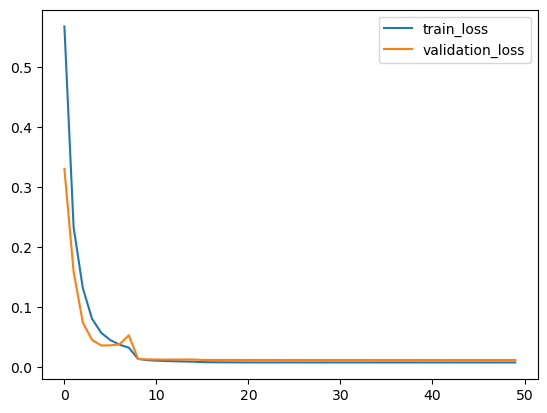

In [75]:
history_dict = history.history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(len(train_loss))
plt.plot(epochs, train_loss, label="train_loss")
plt.plot(epochs, val_loss, label="validation_loss")
plt.legend()
plt.show()

In [76]:
transformer = keras.models.load_model("sincos_transformer.keras",
                                     custom_objects={
                                         "PositionalEmbedding": PositionalEmbedding,
                                         "TransformerEncoder": TransformerEncoder,
                                         "TransformerDecoder": TransformerDecoder,
                                     })

In [ ]:
token_gen = Generate_tokens()
translated_texts = []
print(f"Total Number of Input Text Sequences: {len(test_input_txt)}")
correct_count = 0
rand_idx = np.random.randint(0, high=len(test_input_txt)-1, size=100)
for i in range(len(test_input_txt)):
    if i % 100 == 0: print(f"Currently at sequence {i}, and count: {correct_count}")
    translated_seq = token_gen(test_input_txt[i], target_vectorization,
                    source_vectorization, model=transformer, max_out_seq_len=output_seq_len)
    if i in rand_idx:
        print(f"Model Tranlsated: {translated_seq}")
        print(f"Ground-Truth:     {test_target_txt[i]}")
    if translated_seq == test_target_txt[i]:
        correct_count += 1
    translated_texts.append(translated_seq)

Total Number of Input Text Sequences: 16800
Currently at sequence 0, and count: 0
Model Tranlsated: [start] b d b d a e e c d a h d f g c e c g a d i j a d h k [end]
Ground-Truth:     [start] b d b d a e e c d a h d f g c e c g a d i j a d h k [end]
Currently at sequence 100, and count: 53
Model Tranlsated: [start] c f c e c d a e f a h d e g a e h c d c f a f j k b d a g l m b d a h i ed [UNK] a e [UNK] [end]
Ground-Truth:     [start] c f a e d a e e c e c d a e h a h f g i c d b d a f k l c f a g m ed b d a h j ee ef [end]
Currently at sequence 200, and count: 117
Model Tranlsated: [start] c f c d a e e b d a e g b d a h f h i a e j a f d k [end]
Ground-Truth:     [start] c f c d a e e a e f b d a e h b d a h g i j a f d k [end]
Currently at sequence 300, and count: 185
Currently at sequence 400, and count: 251
Model Tranlsated: [start] b d b d b d a f e f c e a e h a d g i a g d j [end]
Ground-Truth:     [start] b d b d b d a f e f c e a e h a d g i a g d j [end]
Currently at sequen

Currently at sequence 5600, and count: 3385
Model Tranlsated: [start] b d b d a e e c e a h d f g c g b d a d i j a d h k [end]
Ground-Truth:     [start] b d b d a e e c e a h d f g c g b d a d i j a d h k [end]
Model Tranlsated: [start] b d b d a g d e b d c d c d a g h i c d a h g j k a d f l [end]
Ground-Truth:     [start] b d b d a g d e b d c d c d a g h i c d a h g j k a d f l [end]
Currently at sequence 5700, and count: 3446
Currently at sequence 5800, and count: 3506
Currently at sequence 5900, and count: 3565
Model Tranlsated: [start] c f a e d a e e c f a g f g c f c e a f i j a g h k [end]
Ground-Truth:     [start] c f a e d a e e c f a g f g c f c e a f i j a g h k [end]
Currently at sequence 6000, and count: 3617
Model Tranlsated: [start] b d c e b d b d a h e f g a f d h c e c e a h i j k [end]
Ground-Truth:     [start] b d c e b d b d a h e f g a f d h c e c e a h i j k [end]
Currently at sequence 6100, and count: 3692
Model Tranlsated: [start] c e b d c f c d a h e f g 

Currently at sequence 10800, and count: 6562
Currently at sequence 10900, and count: 6623
Currently at sequence 11000, and count: 6675
Model Tranlsated: [start] b d c f b d c d c g a f g h a h e f i c e c e a g k l a h d j m b d a f ed [UNK] [end]
Ground-Truth:     [start] b d c f b d c d c g a f g h a h e f i c e c e a g k l a h d j m b d a f ed ee [end]
Currently at sequence 11100, and count: 6731
Model Tranlsated: [start] c g c f b d c e c f c g a h g h i a d f j a d e k a e l a e m a d d ed c f c d a h [UNK] [UNK] [UNK] [end]
Ground-Truth:     [start] c g c f b d c f a e g a d f h a d e i c g c d a h j k l c f c d a h m ed ee a d d ef a e eg [end]
Currently at sequence 11200, and count: 6792
Model Tranlsated: [start] b d c d c g a g e f b d a e h a g g i a f d j [end]
Ground-Truth:     [start] b d c d c g a g e f b d a e h a g g i a f d j [end]
Model Tranlsated: [start] c f b d b d a e f a e g b d c e a h h i j a e k c e a h e l m b d a h d ed [UNK] [end]
Ground-Truth:     [start] 

Currently at sequence 15400, and count: 9345
Currently at sequence 15500, and count: 9401
Currently at sequence 15600, and count: 9458


In [ ]:
print(f"Model Accuracy: {correct_count / len(translated_texts)}")

In [ ]:
encoder_inputs = keras.Input(shape=(None,), dtype="int64", name="source")
PE_func = getSinCosPositionalEncoding
x = PositionalEmbedding(input_seq_len, input_vocab_size, embed_dim, 
                       positional_encoding=PE_func)(encoder_inputs)
TE = TransformerEncoder(embed_dim, dense_dim, num_heads)(x)

decoder_inputs = keras.Input(shape=(None,), dtype="int64", name="translated")
x = PositionalEmbedding(output_seq_len, output_vocab_size, embed_dim, 
                       positional_encoding=PE_func)(decoder_inputs)
TD = TransformerDecoder(embed_dim, dense_dim, num_heads)(x, TE)
x = layers.Dropout(0.5)(TD)

decoder_outputs = layers.Dense(output_vocab_size, activation="softmax")(x)
transformer = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)
transformer.summary()

In [ ]:
lr = 0.001
weight_decay = 0.01
#optim = tf.keras.optimizers.AdamW(learning_rate=lr, weight_decay=weight_decay)
optim = tf.keras.optimizers.Adam(learning_rate=lr)
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="vanilla_transformer.keras", monitor='val_loss',
                                    saves_best_only=True),
    keras.callbacks.EarlyStopping(monitor="loss", mode="min", patience=12, verbose=1),
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=4, min_lr=1e-7, verbose=1),
]
transformer.compile(
    optimizer=optim,
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy'],
)
history = transformer.fit(train_ds,
                          epochs=12,
                          validation_data=val_ds,
                          callbacks=callbacks)

In [ ]:
history_dict = history.history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(len(train_loss))
plt.plot(epochs, train_loss, label="train_loss")
plt.plot(epochs, val_loss, label="validation_loss")
plt.legend()
plt.show()

# Custom Network Structure

In [44]:
np.argsort([9, 4, 3, 7])[-2]

3

In [95]:
#encoder_inputs = keras.Input(shape=(None,), dtype="int64", name="source")
encoder_inputs = keras.Input(shape=(1,), dtype="string", name="source")
x = source_vectorization(encoder_inputs)
x = PositionalEmbedding(input_seq_len, input_vocab_size, embed_dim)(x)
x = TransformerEncoder(embed_dim, dense_dim, num_heads)(x)
TE = TransformerEncoder(embed_dim, dense_dim, num_heads)(x)

#decoder_inputs = keras.Input(shape=(None,), dtype="int64", name="translated")
decoder_inputs = keras.Input(shape=(1,), dtype="string", name="translated")
x = target_vectorization(decoder_inputs)
x = PositionalEmbedding(output_seq_len, output_vocab_size, embed_dim)(x[:, :-1])
x = TransformerDecoder(embed_dim, dense_dim, num_heads)(x, TE)
TD = TransformerDecoder(embed_dim, dense_dim, num_heads)(x, TE)
x = layers.Dropout(0.5)(x)

decoder_outputs = layers.Dense(output_vocab_size, activation="softmax")(x)
transformer = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)
transformer.summary()

optim = tf.keras.optimizers.Adam()
transformer.compile(
    optimizer=optim,
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy'],
)

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 source (InputLayer)            [(None, 1)]          0           []                               
                                                                                                  
 translated (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 text_vectorization (TextVector  (None, 47)          0           ['source[0][0]']                 
 ization)                                                                                         
                                                                                                  
 text_vectorization_1 (TextVect  (None, 48)          0           ['translated[0][0]']       

In [ ]:
transformer = keras.models.load_model("double_stacked_transformer.keras",
                                     custom_objects={
                                         "PositionalEmbedding": PositionalEmbedding,
                                         "TransformerEncoder": TransformerEncoder,
                                         "TransformerDecoder": TransformerDecoder,
                                     })

In [100]:
transformer.save('test.tf')

INFO:tensorflow:Assets written to: test.tf/assets


INFO:tensorflow:Assets written to: test.tf/assets


In [101]:
model = keras.models.load_model('test.tf',
                               custom_objects={
                                         "PositionalEmbedding": PositionalEmbedding,
                                         "TransformerEncoder": TransformerEncoder,
                                         "TransformerDecoder": TransformerDecoder,
                                     })

ValueError: Unkown value for `standardize` argument of layer TextVectorization. If restoring a model and `standardize` is a custom callable, please ensure the callable is registered as a custom object. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details. Allowed values are: `None`, a `Callable`, or one of the following values: ('lower_and_strip_punctuation', 'lower', 'strip_punctuation'). Received: text_standardization

In [71]:
encoder_inputs = keras.Input(shape=(None,), dtype="string", name="source")
encoder_inputs

 
    target = target_vectorization(target)

<KerasTensor: shape=(None, None) dtype=string (created by layer 'source')>

In [69]:
tf.Tensor([1])

TypeError: __init__() missing 2 required positional arguments: 'value_index' and 'dtype'

# LOAD TEXTVECTORIZATION

In [114]:
from_disk = pickle.load(open("target_vectorization.pkl", "rb"))
new_v = layers.TextVectorization.from_config(from_disk['config'])

new_v.set_weights(from_disk['weights'])


print(new_v.get_vocabulary())
new_v(test_target_txt[0])

['', '[UNK]', 'd', 'a', 'b', 'c', 'f', 'g', 'e', 'h', 'j', 'i', '[start]', '[end]', 'k', 'l', 'm', 'ed']


In [106]:
print(target_vectorization.get_vocabulary())

['', '[UNK]', 'd', 'a', 'b', 'c', 'f', 'g', 'e', 'h', 'j', 'i', '[start]', '[end]', 'k', 'l', 'm', 'ed']


<tf.Tensor: shape=(48,), dtype=int64, numpy=
array([12,  4,  2,  4,  2,  5,  6,  5,  7,  3,  2,  6,  7,  4,  2,  3,  8,
       11,  5,  8,  3,  6, 10, 14,  4,  2,  3,  6, 15, 16,  5,  6,  3,  9,
        9, 17,  1,  3,  7,  8,  1,  3,  2,  2,  1, 13,  0,  0])>